In [61]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Regresion Distancia Ortogonal

$$y = mx + b $$
Dado $(x_0,y_0)$, se define la distancia entre el punto y la recta anterior como:
$$d=\frac{|y_0-(mx_0+b)|}{\sqrt{m^2+1}}$$

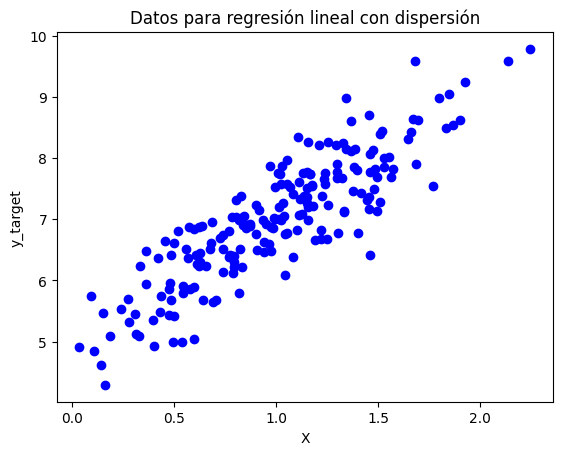

In [62]:
# Parámetros para la recta
m = 2.0  # Pendiente
b = 5.0  # Intercepto

# Generar 200 valores para X con una distribución normal
X = np.random.normal(1.0, 0.5, 200)

# Generar los valores de y utilizando la ecuación de la recta y = Ax + b y añadiendo algo de ruido
noise = np.random.normal(0.0, 0.5, 200)  # Ruido con dispersión
y_target = m * X + b + noise

# Visualización de los datos generados
plt.scatter(X, y_target, color='blue')
plt.title("Datos para regresión lineal con dispersión")
plt.xlabel("X")
plt.ylabel("y_target")
plt.show()

#Valores de los hiperparametros
batch_size = 25
learning_rate=0.1

In [63]:
#Divide en training y test

#saca los id del conjunto de training 80% y de test 20%
train = np.random.choice(len(X), size=round(len(X)*0.8),replace=False)
test = np.array(list(set(range(len(X)))-set(train)))

x_vals_train = X[train]
x_vals_test = X[test]

y_vals_train = y_target[train].reshape(-1,1)
y_vals_test = y_target[test].reshape(-1,1)

In [64]:
# Definir variables y modelo
class Model(tf.Module):
    def __init__(self):
        self.m = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.float32), name='m')
        self.b = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.float32), name='b')
      
    
    def __call__(self, x_data):
        return tf.add(tf.matmul(x_data, self.m), self.b)

model = Model()

In [65]:
# Definir la pérdida y el optimizador
def loss_fn(model, x_data, y_target):

    deming_num = tf.abs(tf.subtract(y_target, model(x_data)))
    demin_den = tf.sqrt(tf.add(tf.square(model.m.numpy()[0][0]), 1.0))
    deming_loss = tf.reduce_mean(tf.truediv(deming_num, demin_den))
    
    return tf.reduce_mean(deming_loss)

optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [66]:
loss_lista=[]
def train_step(model, x_data, y_target):
    with tf.GradientTape() as tape:
        
        loss = loss_fn(model, x_data, y_target)
        loss_lista.append(loss.numpy())
    gradients = tape.gradient(loss, [model.m, model.b])
    optimizer.apply_gradients(zip(gradients, [model.m, model.b]))

In [67]:
#Entremaniento del modelo

for i in range(800):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_x1 = np.array([[x] for x in rand_x], dtype=np.float32)
    rand_y = np.array([y for y in y_vals_train[rand_idx]], dtype=np.float32)
    train_step(model, rand_x1, rand_y)
    if (i + 1) % 100 == 0:
        print('Paso #' + str(i + 1) + ", m= " + str(model.m.numpy()[0][0])+" b= " + str(model.b.numpy()[0][0])) 

Paso #100, m= 3.2867126 b= 3.4647343
Paso #200, m= 3.031144 b= 3.9653208
Paso #300, m= 2.6595454 b= 4.2808814
Paso #400, m= 2.4324384 b= 4.575521
Paso #500, m= 2.2492228 b= 4.721565
Paso #600, m= 2.1761801 b= 4.79748
Paso #700, m= 2.1516914 b= 4.831339
Paso #800, m= 2.1624997 b= 4.8930073


In [68]:
#Calculo del error

x_vals_train = np.array(x_vals_train, dtype=np.float32).reshape(-1,1)
y_vals_train = np.array(y_vals_train, dtype=np.float32).reshape(-1,1)

x_vals_test = np.array(x_vals_test, dtype=np.float32).reshape(-1,1)
y_vals_test = np.array(y_vals_test, dtype=np.float32).reshape(-1,1)

mse_train = loss_fn(model, x_vals_train, y_vals_train).numpy()
mse_test = loss_fn(model, x_vals_test, y_vals_test).numpy()
print("MSE en el conjunto de entrenamiento "+str(np.round(mse_train, 3)))
print("MSE en el conjunto de testing "+str(np.round(mse_test, 3)))

MSE en el conjunto de entrenamiento 0.173
MSE en el conjunto de testing 0.144


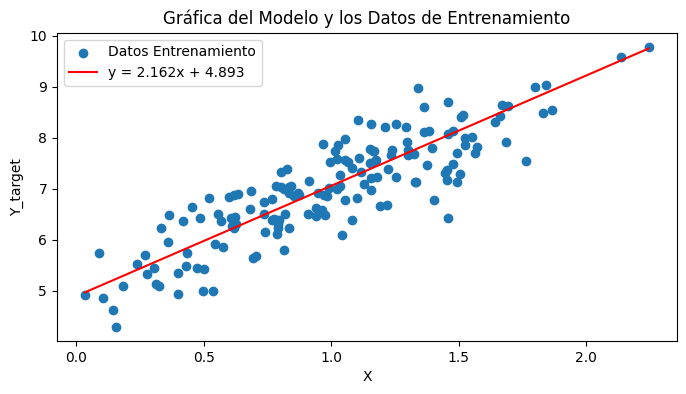

In [69]:
# Gráfica del resultado
plt.figure(figsize=(8, 4))
plt.scatter(x_vals_train, y_vals_train, label='Datos Entrenamiento')
#plt.scatter(x_vals_test, y_vals_test, label='Datos test')

x_line = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_line = model(np.array(x_line, dtype=np.float32)).numpy()
plt.plot(x_line, y_line, 'r-', label=f'y = {model.m.numpy()[0][0]:.3f}x + {model.b.numpy()[0][0]:.3f}')

plt.title("Gráfica del Modelo y los Datos de Entrenamiento")
plt.xlabel('X')
plt.ylabel('Y_target')
plt.legend()
plt.show()

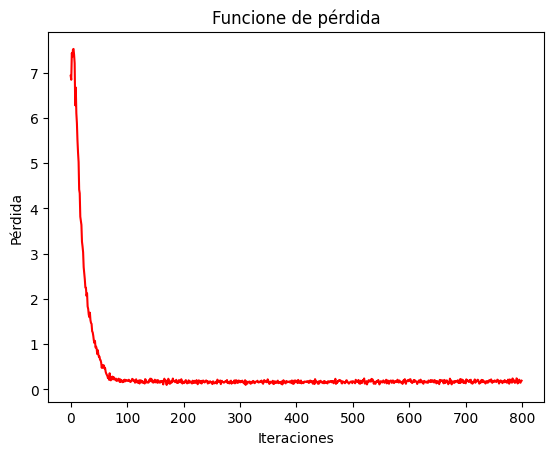

In [70]:
plt.plot(loss_lista, 'r-')
#plt.plot(loss_vect_l2, 'g--', label = "L2")
plt.title("Funcione de pérdida")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.show()